In [162]:
# - pandas: For data manipulation and analysis
# - matplotlib.pyplot: For creating static plots
# - seaborn: For enhanced visualizations (e.g., scatter plots, heatmaps)
# - datetime: For handling date-time operations
# - numpy: For numerical computations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [163]:
 # Setting up the plotting style
plt.style.use('seaborn')
sns.set_palette("deep")

/var/folders/gl/sc9s01490bg0vmyvzpbkn1lm0000gn/T/ipykernel_17749/168234505.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [203]:
# Loading the dataset
df = pd.read_csv("Uber Dataset.csv")
df.head(3)

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


#### Observation: 
1) The dataset contains 13 columns: pickup_dt, borough, pickups, spd, vsb, temp, dewp, slp, pcp01, pcp06, pcp24, sd, hday.
2) The first few rows show pickups vary significantly by borough (e.g., 152 in Bronx vs. 1519 in Brooklyn at 1:00 AM on Jan 1, 2015).
3) Business Insight: High pickup variation by borough suggests targeting high-demand areas like Brooklyn for driver allocation.
4) Variable names need updating for clarity (e.g., spd to wind_speed)
5) Feature engineering needed to extract month, day, hour from pickup_date

These steps are critical for making the dataset intuitive and enabling time-based analysis, which is key for understanding pickup patterns. 

Next, rename columns for clarity using a dictionary. Changes including: pickup_dt to pickup_date, spd to wind_speed, vsb to Visibility, dewp to dew_point, slp to Sea.level.pressure, pcp01 to 1h_Precipitation, pcp06 to 6h_Precipitation, pcp24 to 24h_Precipitation, sd to snow_depth, hday to holiday.

In [165]:
# rename columns using a dictionary
# columns = {'S_name':'new name you wanna give to S_name variable'} --- this is a dictionary and it is the argument of the 
# df.rename() argument. 
df = df.rename(columns={
    'hday': 'holiday',
    'spd': 'wind_speed',
    'temp': 'temp',
    'dewp': 'dew_point',
    'vsb': 'Visibility',
    'slp': 'Sea.level.pressure',
    'pcp01': '1h_Precipitation',
    'pcp06': '6h_Precipitation',
    'pcp24': '24h_Precipitation',
    'pickup_dt': 'pickup_date',
    'sd': 'snow_depth'
})

In [166]:
# Replaces 'Y' with 'Yes' and 'N' with 'No' in the holiday column for readability
# df['Column']=df['Column'].replace('Y', 'Yes')
df['holiday'] = df['holiday'].replace('Y', 'Yes') # change Y -> Yes
df['holiday'] = df['holiday'].replace('N', 'No') # change N -> No

In [167]:
# Verifying renamed columns
df.head(3)

,pickup_date,borough,pickups,wind_speed,Visibility,temp,dew_point,Sea.level.pressure,1h_Precipitation,6h_Precipitation,24h_Precipitation,snow_depth,holiday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Yes
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Yes
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Yes


#### Note: 
1) The dataset has 29,101 rows. Most columns are non-null, but 'borough' has 3,043 missing values (~10.46%). pickup_date is an object (needs conversion to datetime).
2) Business Insight: Missing borough data could skew location-based analysis. Grouping these as 'Unknown' preserves data for analysis.

In [168]:
# Uses df.info() to display column names, non-null counts, and data types
df.info()

# 'pickup_date' is data type 'object' instead of 'date'. This needs to be changed, extract the 'Month','day', 'hour' 
# variables from it for even more deeper insights

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pickup_date         29101 non-null  object 
 1   borough             26058 non-null  object 
 2   pickups             29101 non-null  int64  
 3   wind_speed          29101 non-null  float64
 4   Visibility          29101 non-null  float64
 5   temp                29101 non-null  float64
 6   dew_point           29101 non-null  float64
 7   Sea.level.pressure  29101 non-null  float64
 8   1h_Precipitation    29101 non-null  float64
 9   6h_Precipitation    29101 non-null  float64
 10  24h_Precipitation   29101 non-null  float64
 11  snow_depth          29101 non-null  float64
 12  holiday             29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


In [169]:
# Converts pickup_date from 'object' to 'datetime' for time-based feature extraction. # Observation: This enables extraction of time components (e.g., hour, month), 
# critical for analyzing temporal patterns in pickups.
df['pickup_date'] = pd.to_datetime(df['pickup_date'])

In [170]:
# Verifying datetime conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   pickup_date         29101 non-null  datetime64[ns]
 1   borough             26058 non-null  object        
 2   pickups             29101 non-null  int64         
 3   wind_speed          29101 non-null  float64       
 4   Visibility          29101 non-null  float64       
 5   temp                29101 non-null  float64       
 6   dew_point           29101 non-null  float64       
 7   Sea.level.pressure  29101 non-null  float64       
 8   1h_Precipitation    29101 non-null  float64       
 9   6h_Precipitation    29101 non-null  float64       
 10  24h_Precipitation   29101 non-null  float64       
 11  snow_depth          29101 non-null  float64       
 12  holiday             29101 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), ob

In [171]:
# Adding time-based features. Extracts hour, day_of_week, and month from pickup_date
df['hour'] = df['pickup_date'].dt.hour
df['day_of_week'] = df['pickup_date'].dt.dayofweek
df['month'] = df['pickup_date'].dt.month

In [172]:
# Creates a binary column (1 for weekend, 0 for weekday) based on day_of_week (5=Saturday, 6=Sunday) from newly created 
# variable "day_of_week". Note that pandas has a '0-6' convention (Monday-Sunday)
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int) 

#### Check for missing data
1) Only borough has missing values (3,043), confirming prior info. No duplicates were found (commented code).
2) Business Insight: Handling missing boroughs is critical to avoid biased analysis, especially since they represent ~10% of the data.


In [173]:
df.isnull().sum()
# df.duplicated().sum() # No duplicated data

pickup_date              0
borough               3043
pickups                  0
wind_speed               0
Visibility               0
temp                     0
dew_point                0
Sea.level.pressure       0
1h_Precipitation         0
6h_Precipitation         0
24h_Precipitation        0
snow_depth               0
holiday                  0
hour                     0
day_of_week              0
month                    0
is_weekend               0
dtype: int64

#### Observation: 
Business Insight: Grouping missing boroughs as 'Unknown' preserves data, allowing analysis of pickups in unspecified areas, which may represent less urban zones.

In [204]:
# Handling missing values in borough 
# df['borough'] = df['borough'].replace('NaN', 'Unknown')
df['borough'].replace('NA', 'Unknown').fillna('Unknown')

print(df['borough'].value_counts(dropna=False))

borough
Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
NaN              3043
Name: count, dtype: int64


In [205]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())

# Business Insight: High pickup variability suggests targeting high-demand boroughs.

Summary Statistics:
            pickups           spd           vsb          temp          dewp  \
count  29101.000000  29101.000000  29101.000000  29101.000000  29101.000000   
mean     490.215903      5.984924      8.818125     47.669042     30.823065   
std      995.649536      3.699007      2.442897     19.814969     21.283444   
min        0.000000      0.000000      0.000000      2.000000    -16.000000   
25%        1.000000      3.000000      9.100000     32.000000     14.000000   
50%       54.000000      6.000000     10.000000     46.000000     30.000000   
75%      449.000000      8.000000     10.000000     64.500000     50.000000   
max     7883.000000     21.000000     10.000000     89.000000     73.000000   

                slp         pcp01         pcp06         pcp24            sd  
count  29101.000000  29101.000000  29101.000000  29101.000000  29101.000000  
mean    1017.817938      0.003830      0.026129      0.090464      2.529169  
std        7.768796      0.018933 

#### Observation: Key stats:
 - pickups: Mean ~490, max 7,883, highly skewed to the right (std ~996).
 - wind_speed: 0–21 mph, mean ~6.
 - Visibility: 0–10 miles, mean ~8.8.
 - temp: 2–89°F, mean ~47.7.
 - dew_point: -16–73°F, mean ~30.8.
 - Sea.level.pressure: 991.4–1043.4, mean ~1017.8.
 - Precipitation (1h, 6h, 24h) and snow_depth: Mostly 0, indicating rare adverse weather.

Business Insight: High pickup variability suggests targeting high-demand boroughs. Weather variables show typical ranges, with precipitation and snow being sparse, limiting their impact.

/Users/apple/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/apple/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/apple/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Pickups')

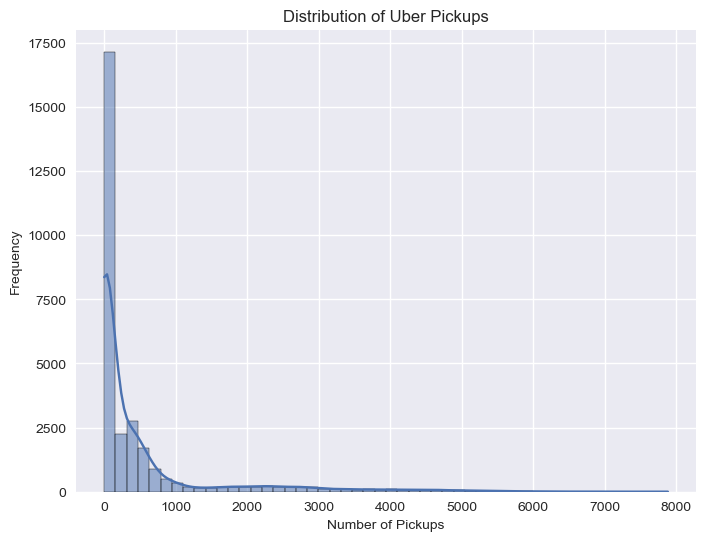

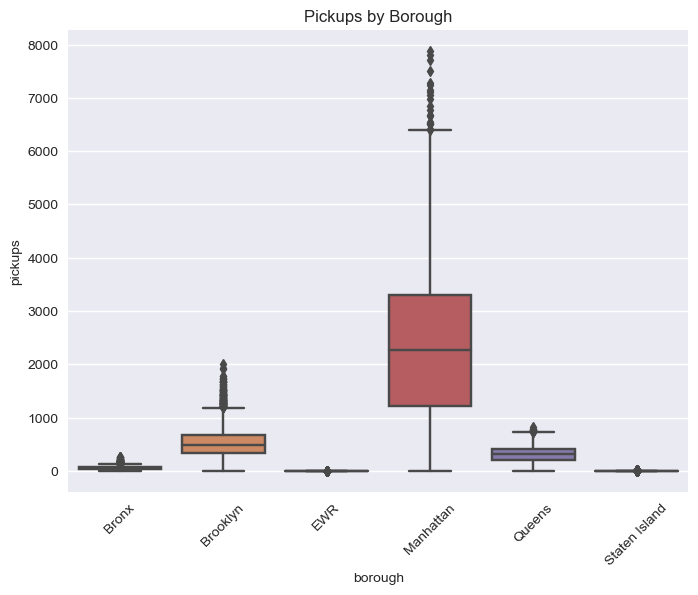

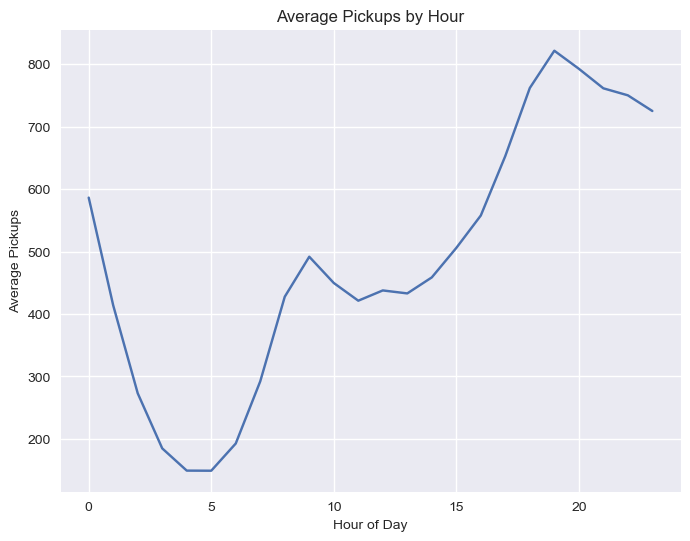

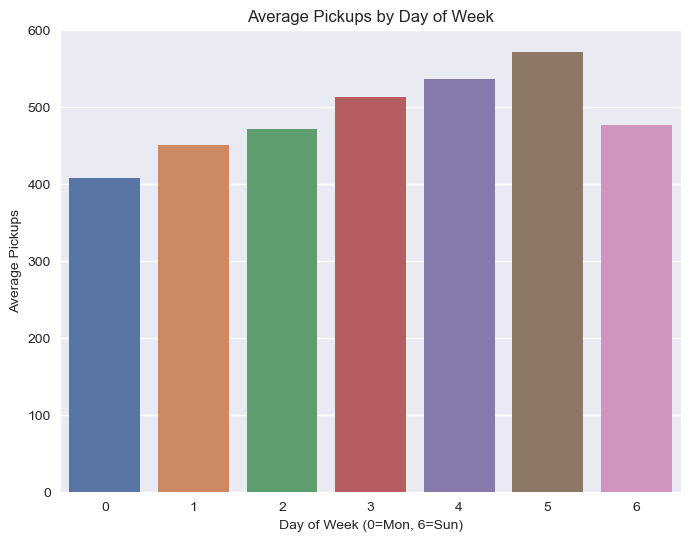

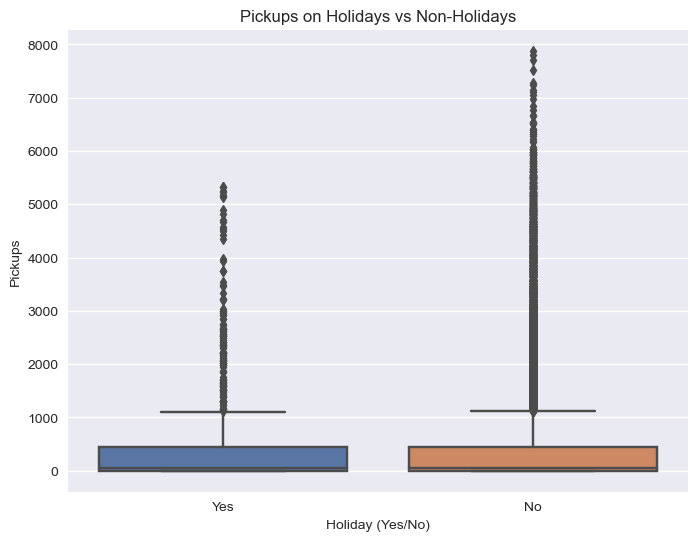

In [176]:
# Univariate Analysis
# Distribution of pickups
plt.figure(figsize=(8, 6))
sns.histplot(df['pickups'], bins=50, kde=True)
plt.title('Distribution of Uber Pickups')
plt.xlabel('Number of Pickups')
plt.ylabel('Frequency')

# Pickups by borough
plt.figure(figsize=(8, 6))
sns.boxplot(x='borough', y='pickups', data=df)
plt.title('Pickups by Borough')
plt.xticks(rotation=45)

# Bivariate Analysis
# Pickups by hour
plt.figure(figsize=(8, 6))
hourly_pickups = df.groupby('hour')['pickups'].mean()
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values)
plt.title('Average Pickups by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Pickups')


# Pickups by day of week
plt.figure(figsize=(8, 6))
weekly_pickups = df.groupby('day_of_week')['pickups'].mean()
sns.barplot(x=weekly_pickups.index, y=weekly_pickups.values)
plt.title('Average Pickups by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Average Pickups')


# Pickups on holidays vs non-holidays
plt.figure(figsize=(8, 6))
sns.boxplot(x='holiday', y='pickups', data=df)
plt.title('Pickups on Holidays vs Non-Holidays')
plt.xlabel('Holiday (Yes/No)')
plt.ylabel('Pickups')

Text(0.5, 0, 'Holiday (Yes/No)')

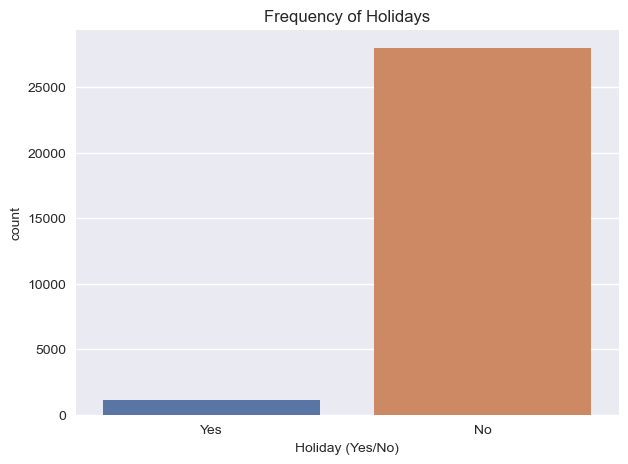

In [147]:
# Holidays are not significant in this analysis
plt.figure(figsize=(7, 5))
sns.countplot(x='holiday', data=df)
plt.title('Frequency of Holidays')
plt.xlabel('Holiday (Yes/No)')

Text(0, 0.5, 'Average Pickups')

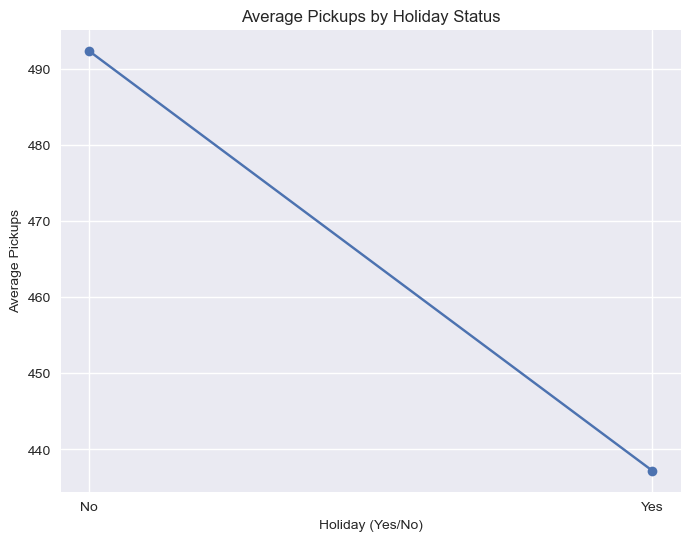

In [177]:
# Plot pickups by holiday
plt.figure(figsize=(8, 6))
hday_pickups = df.groupby('holiday')['pickups'].mean()
plt.plot(hday_pickups.index, hday_pickups.values, marker='o')
plt.title('Average Pickups by Holiday Status')
plt.xlabel('Holiday (Yes/No)')
plt.ylabel('Average Pickups')

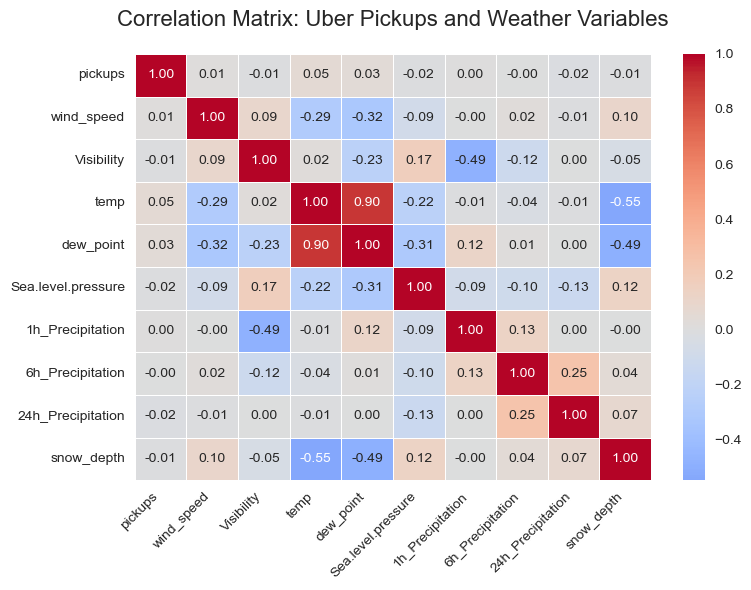

In [201]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix, 
    annot=True, # Show correlation values
    cmap='coolwarm', 
    center=0, # Center the colormap at 0
    fmt='.2f',  # Format numbers to 2 decimal places
    linewidths=0.5 # Lines between cells
)

plt.title('Correlation Matrix: Pickups and Weather Variables')

# Customize the plot
plt.title('Correlation Matrix: Uber Pickups and Weather Variables', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

Text(0, 0.5, 'Pickups')

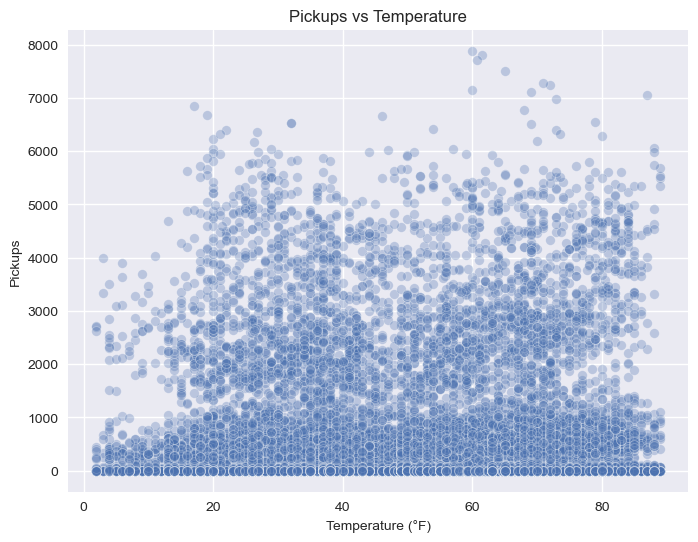

In [208]:
# Scatter plot: Pickups vs Temperature. 
# Business Insight: Warmer weather may slightly boost demand

plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='pickups', data=df, alpha=0.3)
plt.title('Pickups vs Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Pickups')

### General observations from the above analysis
- Borough: Manhattan drives most pickups, followed by Brooklyn and Queens.
- Time: Evening and weekend peaks suggest commuter and leisure demand.
- Holiday: Slight increase, likely tourism-driven.
- Weather: Weak effects, with temperature slightly positive, precipitation/snow negative.
- EWR: Zero pickups are surprising for an airport, possibly due to data issues or Uber’s limited airport service in 2015.

#### Business Insights:
- Allocate more drivers to Manhattan, Brooklyn, and Queens, especially during evening hours (5–10 PM) and weekends. Or make driver compensation slightly highly for these three boroughs. 
- Plan for slight demand spikes on holidays for the availability of vehicles, particularly in Manhattan, possibly due to tourism.
- Weather has a minor impact, but prepare for reduced demand during heavy rain or snow. Also, give drivers more incentives during low precipitation periods to maintain service to the population. 